## Week 7: Morphine modeling
Now, we'll make an example for morphine, which has its PK parameters gathered from Stuart-harris et al. (2000,https://doi.org/10.1046/j.1365-2125.2000.00141.x).

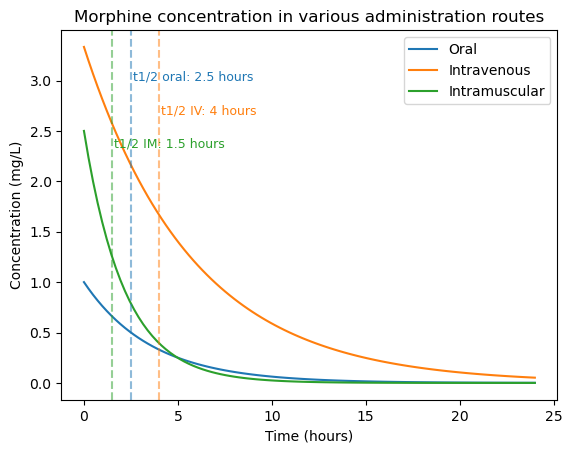

In [3]:
## ASFPKD 7B: Morphine modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define PK parameters
Vd = 3  # Volume of distribution (L/kg), assuming a 70 kg individual
F_oral = 0.3
F_iv = 1.0
F_im = 0.75
D = 10  # Dosage (mg)

# Half-lives for each administration route (in hours)
t_half_oral = 2.5
t_half_iv = 4
t_half_im = 1.5

# Calculate kel for each administration route
kel_oral = 0.693 / t_half_oral
kel_iv = 0.693 / t_half_iv
kel_im = 0.693 / t_half_im

# Model function
def pk_model(y, t, kel, Vd):
    C = y  # Drug concentration
    dCdt = -kel * C
    return dCdt

# Time points (in hours)
t = np.linspace(0, 24, 100)

# Initial conditions
C0_oral = (D * F_oral) / Vd
C0_iv = (D * F_iv) / Vd
C0_im = (D * F_im) / Vd

# Solve ODE for each route of administration using odeint
solution_oral = odeint(pk_model, C0_oral, t, args=(kel_oral, Vd))
solution_iv = odeint(pk_model, C0_iv, t, args=(kel_iv, Vd))
solution_im = odeint(pk_model, C0_im, t, args=(kel_im, Vd))

# Create plot
line_oral, = plt.plot(t, solution_oral, label='Oral')
line_iv, = plt.plot(t, solution_iv, label='Intravenous')
line_im, = plt.plot(t, solution_im, label='Intramuscular')

# Colors for each line
colors = {'Oral': line_oral.get_color(), 'Intravenous': line_iv.get_color(), 'Intramuscular': line_im.get_color()}

# Draw dashed lines for half-lives and add labels with actual values
y_max = max(max(solution_oral), max(solution_iv), max(solution_im))
label_info = [
    (t_half_oral, 't1/2 oral: {} hours'.format(t_half_oral), 'Oral', 0.9),
    (t_half_iv, 't1/2 IV: {} hours'.format(t_half_iv), 'Intravenous', 0.8),
    (t_half_im, 't1/2 IM: {} hours'.format(t_half_im), 'Intramuscular', 0.7)
]
for (half_life, label, line_label, y_pos_factor) in label_info:
    plt.axvline(x=half_life, color=colors[line_label], linestyle='--', alpha=0.5)
    plt.text(half_life + 0.1, y_max * y_pos_factor, label, fontsize=9, color=colors[line_label])

plt.title('Morphine concentration in various administration routes')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.legend()
plt.show()
